In [11]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler

### 데이터 로드

In [2]:
#로컬 데이터 로드
file = "C:/Users/송이두/Desktop/가천대/2-1/인공지능개론/과제/data/car_evaluation.csv"
data = pd.read_csv(file)

In [3]:
#파일 확인
data.head()

,vhigh,vhigh.1,2,2.1,small,low,unacc
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc


In [4]:
#데이터 정보 확인
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1727 entries, 0 to 1726
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   vhigh    1727 non-null   object
 1   vhigh.1  1727 non-null   object
 2   2        1727 non-null   object
 3   2.1      1727 non-null   object
 4   small    1727 non-null   object
 5   low      1727 non-null   object
 6   unacc    1727 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


### 결측치 확인

In [5]:
#isna()통해 결측치 확인 (True or False), sum()을 통해 True의 합 반환
data.isna().sum()

vhigh      0
vhigh.1    0
2          0
2.1        0
small      0
low        0
unacc      0
dtype: int64

### 레이블 확인 <br/>
레이블이 불균형을 띄고 있음을 알 수 있다.

In [6]:
#value_counts()를 통해 unacc 열의 고유값 수 확인
data["unacc"].value_counts()

unacc
unacc    1209
acc       384
good       69
vgood      65
Name: count, dtype: int64

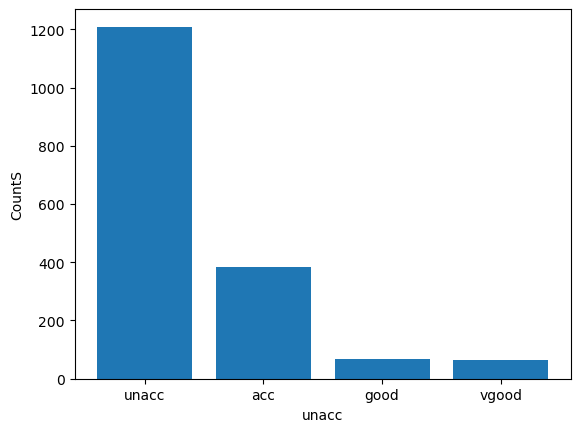

In [7]:
# plt 차트를 이용해 시각화
x = data['unacc'].value_counts().index
y = data['unacc'].value_counts().values
plt.bar(x, y)
plt.xticks(x)
plt.xlabel('unacc')
plt.ylabel("CountS")
plt.show()

### 인코딩 <br/>
모든 데이터가 object형이므로 숫자형으로 인코딩해준다.

In [8]:
#for문을 통해 각 컬럼 숫자형으로 인코딩
label_encoder = LabelEncoder()
column_to_encode = ['vhigh', 'vhigh.1', '2', '2.1', 'small', 'low', 'unacc']
encoded_data = data.copy()
for column in column_to_encode:
    encoded_data[column] = label_encoder.fit_transform(encoded_data[column])

In [9]:
#인코딩 후 데이터 정보 확인
encoded_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1727 entries, 0 to 1726
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   vhigh    1727 non-null   int32
 1   vhigh.1  1727 non-null   int32
 2   2        1727 non-null   int32
 3   2.1      1727 non-null   int32
 4   small    1727 non-null   int32
 5   low      1727 non-null   int32
 6   unacc    1727 non-null   int32
dtypes: int32(7)
memory usage: 47.4 KB


### 데이터 스케일링

In [24]:
# 데이터 스케일링을 위해 X와 y값 분리
X = encoded_data.drop(['unacc'], axis=1)
y = encoded_data['unacc'].copy()

In [25]:
# X값 스케일링
scaler = StandardScaler()
scaled_X = scaler.fit_transform(X)

In [26]:
# 스케일링 전 후 비교
X[:5], scaled_X[:5]

(   vhigh  vhigh.1  2  2.1  small  low
 0      3        3  0    0      2    2
 1      3        3  0    0      2    0
 2      3        3  0    0      1    1
 3      3        3  0    0      1    2
 4      3        3  0    0      1    0,
 array([[ 1.34272909e+00,  1.34272909e+00, -1.34272909e+00,
         -1.22563179e+00,  1.22563179e+00,  1.22439044e+00],
        [ 1.34272909e+00,  1.34272909e+00, -1.34272909e+00,
         -1.22563179e+00,  1.22563179e+00, -1.22439044e+00],
        [ 1.34272909e+00,  1.34272909e+00, -1.34272909e+00,
         -1.22563179e+00,  7.09277656e-04,  0.00000000e+00],
        [ 1.34272909e+00,  1.34272909e+00, -1.34272909e+00,
         -1.22563179e+00,  7.09277656e-04,  1.22439044e+00],
        [ 1.34272909e+00,  1.34272909e+00, -1.34272909e+00,
         -1.22563179e+00,  7.09277656e-04, -1.22439044e+00]]))

### 훈련 세트, 테스트 세트 분리

In [14]:
X = encoded_data.drop(['unacc'], axis=1)
y = encoded_data['unacc'].copy()

In [15]:
X_train, X_test, y_train, y_test = train_test_split(scaled_X, y, test_size=0.2, random_state=0)

### RF(랜덤 포레스트) 분류

In [16]:
# 모델 선언
rf_clf = RandomForestClassifier(random_state=0)
# 모델 학습
rf_clf.fit(X_train, y_train)
#예측 생성
pred_rf = rf_clf.predict(X_test)
# accuracy 및 confusion matrix 확인
acc_rf = accuracy_score(y_test, pred_rf)
print(f"accuracy: {acc_rf}")
cm_rf = confusion_matrix(y_test, pred_rf)
print(f"confusion matrix:\n{cm_rf}")

accuracy: 0.9739884393063584
confusion matrix:
[[ 72   1   4   0]
 [  1  10   0   3]
 [  0   0 239   0]
 [  0   0   0  16]]


### LR(로지스틱 회귀) 분류

In [17]:
# 모델 선언
lr_clf = LogisticRegression(random_state=0)
# 모델의 수렴을 위한 스케일링
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
# 모델 학습
lr_clf.fit(X_train_scaled, y_train)
#예측 생성
pred_lr = lr_clf.predict(X_test_scaled)
# accuracy 및 confusion matrix 확인
acc_lr = accuracy_score(y_test, pred_lr)
print(f"accuracy: {acc_lr}")
cm_lr = confusion_matrix(y_test, pred_lr)
print(f"confusion matrix:\n{cm_lr}")

accuracy: 0.6907514450867052
confusion matrix:
[[ 18   0  55   4]
 [  2   0  12   0]
 [ 16   0 221   2]
 [  4   0  12   0]]


### KNN(K 최근접 이웃) 분류

In [18]:
#모델 선언
knn_clf = KNeighborsClassifier(n_neighbors=3)
# 모델 학습
knn_clf.fit(X_train, y_train)
#예측 생성
pred_knn = knn_clf.predict(X_test)
# accuracy 및 confusion matrix 확인
acc_knn = accuracy_score(y_test, pred_knn)
print(f"accuracy: {acc_knn}")
cm_knn = confusion_matrix(y_test, pred_knn)
print(f"confusion matrix:\n{cm_knn}")

accuracy: 0.8728323699421965
confusion matrix:
[[ 61   0  15   1]
 [ 11   3   0   0]
 [ 11   0 228   0]
 [  6   0   0  10]]


### SVM(서포트 벡터 머신) 분류

In [19]:
# 모델 선언
svm_clf = SVC(random_state=0)
# 모델 학습
svm_clf.fit(X_train, y_train)
#예측 생성
pred_svm = svm_clf.predict(X_test)
# accuracy 및 confusion matrix 확인
acc_svm = accuracy_score(y_test, pred_svm)
print(f"accuracy: {acc_svm}")
cm_svm = confusion_matrix(y_test, pred_svm)
print(f"confusion matrix:\n{cm_svm}")

accuracy: 0.8786127167630058
confusion matrix:
[[ 62   1  14   0]
 [  9   4   0   1]
 [ 17   0 222   0]
 [  0   0   0  16]]
